In [ ]:
#Calculate the mean and std
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

data_dir = "/kaggle/input/plantvillage-dataset/plantvillage dataset/color" # Corrected path
simple_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root=data_dir, transform=simple_transform) # Changed variable name from datasets to dataset
dataloader = DataLoader(dataset=dataset, batch_size=32, shuffle=False, num_workers=2) # Changed variable name from DataLoader to dataloader, set shuffle to False for consistent mean/std calculation


mean = 0.0
std = 0.0
total_images = 0

for images, _ in dataloader: # Changed variable name from image to images
    batch_samples = images.size(0) # Changed variable name from batch_sample to batch_samples and from img to images
    images = images.view(batch_samples, images.size(1), -1) # Reshape images to (batch_size, channels, height * width)
    mean += images.mean(2).sum(0) # Calculate mean over height*width and sum over batch
    std += images.std(2).sum(0) # Calculate std over height*width and sum over batch
    total_images += batch_samples # Accumulate total number of images

mean /= total_images
std /= total_images

print(f"Mean: {mean}")
print(f"Std: {std}")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/plantvillage-dataset/plantvillage dataset/color'

Download dataset and list all data path

In [ ]:
import kagglehub
from pathlib import Path
# Download latest version
path = Path(kagglehub.dataset_download("abdallahalidev/plantvillage-dataset"))
print("Path to dataset files:", path)
#get all .jpg file recursivel
all_images = list(path.rglob("*.jpg"))

print("Total image files:", len(all_images))
print("sample files:/n", all_images[:10])

Path to dataset files: /kaggle/input/plantvillage-dataset
Total image files: 57306
sample files:/n [PosixPath('/kaggle/input/plantvillage-dataset/plantvillage dataset/segmented/Tomato___Late_blight/081d1e25-3f06-46a1-95ef-d10a62faa80f___GHLB2 Leaf 8600_final_masked.jpg'), PosixPath('/kaggle/input/plantvillage-dataset/plantvillage dataset/segmented/Tomato___Late_blight/e6703c22-86f7-4bdf-9733-072180761976___RS_Late.B 5522_final_masked.jpg'), PosixPath('/kaggle/input/plantvillage-dataset/plantvillage dataset/segmented/Tomato___Late_blight/9f946f43-424a-41be-9f91-b14fa3f2b37a___GHLB2 Leaf 8892_final_masked.jpg'), PosixPath('/kaggle/input/plantvillage-dataset/plantvillage dataset/segmented/Tomato___Late_blight/dfc45d56-7ecb-46a5-b9da-9297df393f7b___RS_Late.B 6928_final_masked.jpg'), PosixPath('/kaggle/input/plantvillage-dataset/plantvillage dataset/segmented/Tomato___Late_blight/84b7d3ab-56ae-4eef-a852-7b32f3ef0160___GHLB2 Leaf 150_final_masked.jpg'), PosixPath('/kaggle/input/plantvillage-

Import library

In [ ]:
import pandas as np
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim



ImportError: cannot import name 'Module' from 'tensorflow.keras.models' (/usr/local/lib/python3.11/dist-packages/keras/_tf_keras/keras/models/__init__.py)

Check vision

In [ ]:
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


Get data *list* and path

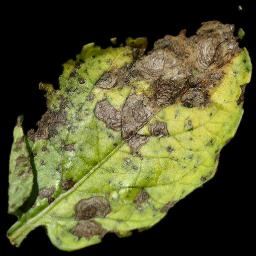

In [ ]:
import random
from PIL import Image

#set seed
#random.seed(44)

#1.get all image pathj
all_image = list(path.glob("*/*/*.jpg"))
#pick a random image path
random_image_path = random.choice(all_images)
#get image class from path name(the image class is the name of the directory where the image is stored)
all_image = random_image_path.parent.stem
#open image
img = Image.open(random_image_path)
img

try to visualize! visualize! visualize

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

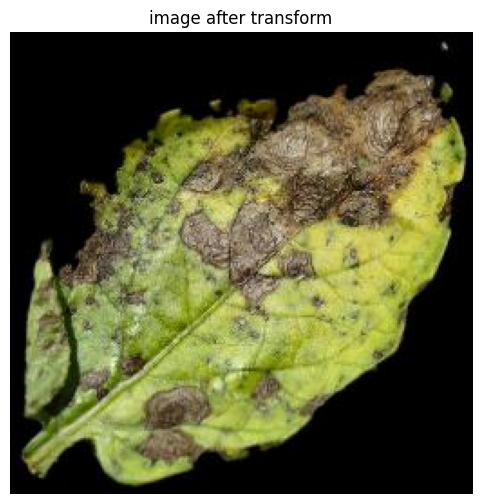

In [ ]:
#turn the image into array
img_as_array = np.array(img)
#plot the image
plt.figure(figsize=(12,6))
plt.imshow(img_as_array)
plt.xlabel(all_image)
plt.title("image after transform")
plt.axis(False)

Now transform data

In [ ]:
image_data_train_transform = transforms.Compose([
    #resize our image to 255,255
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=0.05),
    transforms.RandomRotation(degrees=10),
    transforms.RandomAffine(degrees=0, translate=(0.1,0.1), scale=(0.9,1.1)),
    #turn the data into a torch.tensor
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4667, 0.4894, 0.4106],
                         std=[0.1697, 0.1425, 0.1867])
])
image_data_test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4667, 0.4894, 0.4106],
                         std=[0.1697, 0.1425, 0.1867])
])

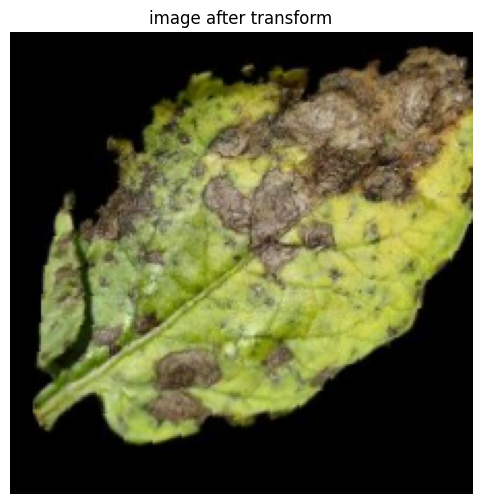

In [ ]:
#plot what we transform data
mean = torch.tensor([0.4667, 0.4894, 0.4106])
std = torch.tensor([0.1697, 0.1425, 0.1867])

def unnormalize(img_tensor, mean, std):
  img_tensor = img_tensor.clone() #make the copy so we don't modify the original
  for t, m, s in zip(img_tensor, mean, std): # t mean channel, m mean mean value, s mean standard deviation
    t.mul_(s).add_(m) #this means t = t * std + mean
  return img_tensor

#apply transform
img_data_after_transform = image_data_train_transform(img)

#unnormalize for visualization
img_data_unnorm = unnormalize(img_data_after_transform, mean, std)

#convert to numpy and plot
img_data_after_transform_array = img_data_unnorm.permute(1,2,0).numpy().clip(0,1) #permute(1,2,0) mean change shape from [3,H,W] - > [H,W,3]
#clip mean ensure values stay in the valid range for display(0,1)
plt.figure(figsize=(12,6))
plt.imshow(img_data_after_transform_array)
plt.title("image after transform")
plt.axis(False)
plt.show()


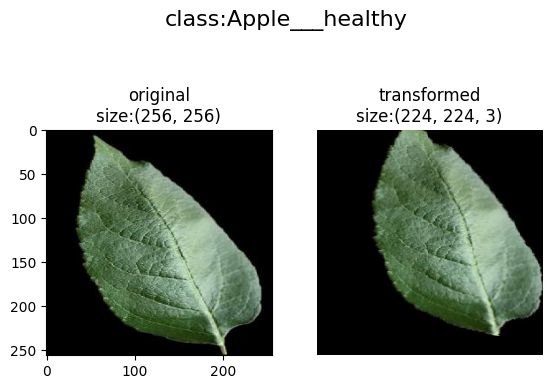

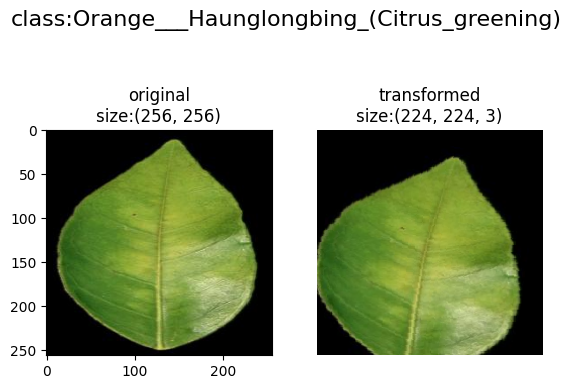

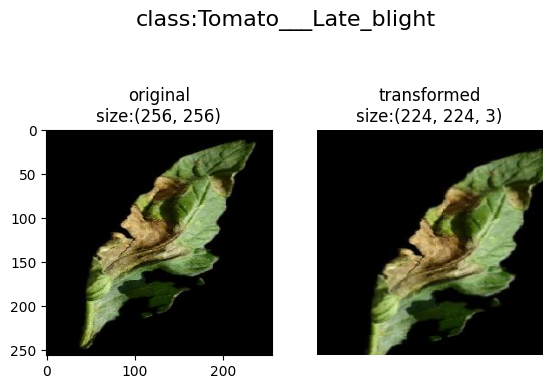

In [ ]:
import random
from PIL import Image

def plot_transformed_image(image_paths, transforms, n=3, seed=None):
  """
  Selects random images from a list of image paths and loads/transforms
  them, then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n) # Renamed for clarity
  for image_path in random_image_paths: # Iterate directly over the random paths
    with Image.open(image_path) as F:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(F)
      ax[0].set_title(f"original\nsize:{F.size}")
      #transform and plot target image
      transform_image = transforms(F) # applu the transformation
      transform_image = transform_image.permute(1,2,0).numpy()# we will need to change shape for matplotlib(C,H,W) -> (H,W,C)

      #unnormallize the image
      mean = torch.tensor([0.4667, 0.4894, 0.4106])
      std = torch.tensor([0.1697, 0.1425, 0.1867])
      transform_image = transform_image * std.numpy() + mean.numpy()
      transform_image = np.clip(transform_image, 0,1)
      ax[1].imshow(transform_image)
      ax[1].set_title(f"transformed\nsize:{transform_image.shape}") # Added a title for the transformed image
      ax[1].axis("off")
      fig.suptitle(f"class:{image_path.parent.stem}", fontsize=16) # Changed subtitle to suptitle and fixed variable name
      plt.show() # Added plt.show() to display the plot

# Corrected the function call with the correct arguments
plot_transformed_image(image_paths=all_images,
                       transforms=image_data_train_transform,
                       n=3,
                       seed=42)

Loading image data with imagefolder

In [ ]:
train_data = datasets.ImageFolder(root=path / "plantvillage dataset" / "color", # Corrected path
                   transform = image_data_train_transform,
                   target_transform=None)
test_data = datasets.ImageFolder(root=path / "plantvillage dataset" / "color", # Corrected path
                   transform = image_data_train_transform) # Assuming test data also uses train transform for consistency

  Get class name as list

In [ ]:
class_names = train_data.classes
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

Get class name as dict

In [ ]:
class_names = train_data.class_to_idx
class_names

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

Check the length of dataset

In [ ]:
len(train_data), len(test_data)

(54305, 54305)

Index on the train_data dataset to get a single image and label

In [ ]:
img, label = train_data[0][0], test_data[0][1]
print(f"image tensor:\n {img}")
print(f"image shape: {img.shape}")
print(f"image datatype: {img.dtype}")
print(f"image label: {label}")
print(f"label datatype: {type(label)}")

image tensor:
 tensor([[[-2.7501, -2.7501, -2.7501,  ..., -2.7501, -2.7501, -2.7501],
         [-2.7501, -2.7501, -2.7501,  ..., -2.7501, -2.7501, -2.7501],
         [-2.7501, -2.7501, -2.7501,  ..., -2.7501, -2.7501, -2.7501],
         ...,
         [-2.7501, -2.7501, -2.7501,  ...,  0.0460,  0.0460,  0.0691],
         [-2.7501, -2.7501, -2.7501,  ...,  0.0922,  0.0922,  0.1153],
         [-2.7501, -2.7501, -2.7501,  ...,  0.1385,  0.1616,  0.1616]],

        [[-3.4344, -3.4344, -3.4344,  ..., -3.4344, -3.4344, -3.4344],
         [-3.4344, -3.4344, -3.4344,  ..., -3.4344, -3.4344, -3.4344],
         [-3.4344, -3.4344, -3.4344,  ..., -3.4344, -3.4344, -3.4344],
         ...,
         [-3.4344, -3.4344, -3.4344,  ..., -0.5448, -0.5448, -0.5173],
         [-3.4344, -3.4344, -3.4344,  ..., -0.4898, -0.4898, -0.4622],
         [-3.4344, -3.4344, -3.4344,  ..., -0.4347, -0.4072, -0.4072]],

        [[-2.1993, -2.1993, -2.1993,  ..., -2.1993, -2.1993, -2.1993],
         [-2.1993, -2.1993, -2

Text(0.5, 1.0, 'Image after unnormalizing')

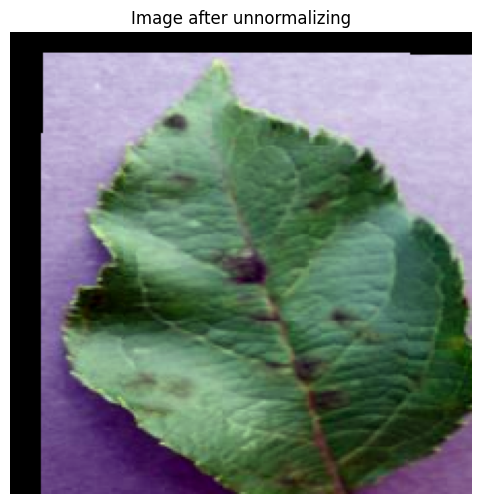

In [ ]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Unnormalize the image tensor
img_un = unnormalize(img, mean, std)

# Rearrange dimensions
img_un = img_un.permute(1, 2, 0)

#clip to [0,1] for valid display
img_un = torch.clamp(img_un, 0, 1) #this code is for restrict all pixel between 0 and 1 before plotting


# Plot
plt.figure(figsize=(6, 6))
plt.imshow(img_un)
plt.axis("off")
plt.title("Image after unnormalizing")


  Turn loaded image into dataloader's

In [ ]:
from torch.utils.data import DataLoader
import os
#set batch_size
batch_size=64
num_workers = 0 # Changed num_workers to 0 to potentially resolve multiprocessing issues
train_dataloader = DataLoader(dataset=train_data,
                  batch_size=batch_size,
                  num_workers=num_workers, # Corrected num_worker to num_workers
                  shuffle=True,
                  pin_memory=True)
test_dataloader = DataLoader(dataset=test_data,
                  batch_size=batch_size,
                  num_workers=num_workers, # Corrected num_worker to num_workers
                  shuffle=False)

In [ ]:
num_workers

0

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x799da24a0b10>,
 <torch.utils.data.dataloader.DataLoader at 0x799d93d24b50>)

Create resnet model class

*   List item
*   List item



In [ ]:
import torch.nn as nn
import torchvision.models as models
from torchvision.models import ResNet50_Weights

def create_resnet_model(num_classes: int):
   #load a pre-trained resnet50 model
    model = models.resnet50(weights=ResNet50_Weights.DEFAULT)
    #freeze the base model parameters
    for param in model.parameters():
        param.requires_grad = False

      #replace the final fully conencted layer
    model.fc = nn.Linear(in_features=model.fc.in_features, out_features=num_classes)
    return model

In [ ]:
#create instance of tinyvgg
torch.manual_seed(42)
# Define device
device = "cuda" if torch.cuda.is_available() else "cpu"
# insatantial the model
model = create_resnet_model(num_classes=len(train_data.classes)).to(device)
print(model)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 180MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Try a forward pass on a single image

In [ ]:
#Get a single image batch
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape
#batch size will now be 1, you can change the batch size if you like
print(f"image shape: {image_batch.shape} -> [batch_size, color_channels, height, width]")
print(f"label shape: {label_batch.shape}")

image shape: torch.Size([64, 3, 224, 224]) -> [batch_size, color_channels, height, width]
label shape: torch.Size([64])


In [ ]:
32 * 3 * 128 * 128

1572864

In [ ]:
#try a forward pass
model(image_batch.to(device))

tensor([[ 0.0603,  0.0800,  0.1339,  ...,  0.0337, -0.0528, -0.0609],
        [ 0.0203, -0.1164, -0.0867,  ..., -0.0139, -0.1569,  0.0390],
        [-0.0772,  0.1426,  0.0385,  ..., -0.2410, -0.0133,  0.1096],
        ...,
        [ 0.1555,  0.1080,  0.0805,  ...,  0.1628,  0.0883, -0.1530],
        [-0.0260,  0.1856,  0.1626,  ..., -0.0522, -0.0470, -0.1509],
        [ 0.0748, -0.0363,  0.1650,  ...,  0.0796, -0.2616, -0.0938]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

Try intall torchinfo. import it if available

In [ ]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo
from torchinfo import summary
summary(model, input_size=[32, 3, 224, 224])

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [32, 38]                  --
├─Conv2d: 1-1                            [32, 64, 112, 112]        (9,408)
├─BatchNorm2d: 1-2                       [32, 64, 112, 112]        (128)
├─ReLU: 1-3                              [32, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [32, 64, 56, 56]          --
├─Sequential: 1-5                        [32, 256, 56, 56]         --
│    └─Bottleneck: 2-1                   [32, 256, 56, 56]         --
│    │    └─Conv2d: 3-1                  [32, 64, 56, 56]          (4,096)
│    │    └─BatchNorm2d: 3-2             [32, 64, 56, 56]          (128)
│    │    └─ReLU: 3-3                    [32, 64, 56, 56]          --
│    │    └─Conv2d: 3-4                  [32, 64, 56, 56]          (36,864)
│    │    └─BatchNorm2d: 3-5             [32, 64, 56, 56]          (128)
│    │    └─ReLU: 3-6                    [32, 64, 56, 56]   

Create train and test loop function

train_step() - take in a model and dataloader and trains the model on the dataloader


test_step() - take in a model and dataloader and evaluate the model on the dataloader

In [ ]:
#create train_step()
def train_step(model: torch.nn.Module,
        dataloader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        optimizer: torch.optim.Optimizer,
        device=device):
  #put the model in train mode
  model.train()
  #setup train loss and train accuracy values
  train_loss, train_acc = 0,0 # Initialize train_loss and train_acc
  #loop through data loader data batches
  for batch, (X,y) in enumerate(dataloader):
    #send data to the target device
    X,y = X.to(device), y.to(device)
    #1.Forward pass
    y_pred = model(X) #output model logits
    #2.calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    #3.optimizer zero grad
    optimizer.zero_grad()
    #4.Loss backward
    loss.backward()
    #5.optimizer step
    optimizer.step()
    #calculate accuracy metric
    print(f"Shape of y_pred before softmax and argmax: {y_pred.shape}") # Debug print
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  #adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

Create a test step

In [ ]:
def test_step(model: torch.nn.Module,
       dataloader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        device=device):
  #put model in eval mode
  model.eval()
  #setup test loss and test accuracy value
  test_loss, test_acc = 0,0 # Initialize test_loss and test_acc
  #turn on inference mode
  with torch.inference_mode():
    #loop through dataloader batches
    for batch, (X,y) in enumerate(dataloader):
      #send data to the target device
      X,y = X.to(device), y.to(device)
      #forward pass
      test_pred_logits = model(X)
      #calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()
      #calculate the accuracy
      print(f"Shape of test_pred_logits before argmax: {test_pred_logits.shape}") # Debug print
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  #adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

Create a train() function to combaine train_step() and test_step()


In [ ]:
from re import L
from tqdm.auto import tqdm
#create resnet50 with output classes = number of train class
model = create_resnet_model(num_classes=len(train_data.classes)).to(device)
#define optimizer
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)
#create a train function that make in various model parameter + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
      train_dataloader: torch.utils.data.DataLoader,
      test_dataloader: torch.utils.data.DataLoader,
      optimizer: torch.optim.Optimizer,
      loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
      epochs: int = 10,
      device = device):
  #create empty results dictionary
  results = {"train_loss":[],
        "train_acc":[],
        "test_loss":[],
        "test_acc":[]}
  #loop through training and testing steps for a number of epochs
  #we don't need optimizer
  for epoch in tqdm(range(epochs)): # Renamed loop variable to epoch
    train_loss, train_acc = train_step(model=model,
                      dataloader=train_dataloader,
                      loss_fn=loss_fn,
                      optimizer=optimizer,
                     device=device)
    test_loss, test_acc = test_step(model=model,
                     dataloader=test_dataloader,
                     loss_fn=loss_fn,
                     device=device)

    #print out what's happening
    print(f"Epoch: {epoch} | train_loss: {train_loss: 4f} | test loss: {test_loss: 4f} | test acc: {test_acc: 4f}")

    #update result dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc) # Corrected typo from resulte to results
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  #return the filled results as the end of the epochs
  return results

In [ ]:
len(train_dataloader)

849

In [ ]:
import torch
print(torch.cuda.is_available())
!nvidia-smi

True
Wed Aug  6 17:11:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   51C    P0             29W /   72W |    1191MiB /  23034MiB |      4%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+

Train and evaluate model 0

In [ ]:
#set random seeds
import torch
torch.manual_seed(42)
torch.cuda.manual_seed(42)
#set num of epochs
num_epochs = 10
#recreate an instance of tinyvgg
model_resnet = create_resnet_model(num_classes=len(train_data.classes)).to(device)
#setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_resnet.parameters(), lr=0.001)
#start the time
from timeit import default_timer as timer
start_time = timer()
#train model_0
resnet_result = train(model=model_resnet,
            train_dataloader = train_dataloader, # Changed to train_dataloader
            test_dataloader = test_dataloader, # Changed to test_dataloader
            optimizer=optimizer,
            loss_fn=loss_fn,
            epochs=num_epochs)

#end the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds") # Fixed f-string syntax

  0%|          | 0/10 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
Shape of y_pred before softmax and argmax: torch.Size([64, 38])
Shape of y_pred before softmax and argmax: torch.Size([64, 38])
Shape of y_pred before softmax and argmax: torch.Size([64, 38])
Shape of y_pred before softmax and argmax: torch.Size([64, 38])
Shape of y_pred before softmax and argmax: torch.Size([64, 38])
Shape of y_pred before softmax and argmax: torch.Size([64, 38])
Shape of y_pred before softmax and argmax: torch.Size([64, 38])
Shape of y_pred before softmax and argmax: torch.Size([64, 38])
Shape of y_pred before softmax and argmax: torch.Size([64, 38])
Shape of y_pred before softmax and argmax: torch.Size([64, 38])
Shape of y_pred before softmax and argmax: torch.Size([64, 38])
Shape of y_pred before softmax and argmax: torch.Size([64, 38])
Shape of y_pred before softmax and argmax: torch.Size([64, 38])
Shape of y_pred before softmax and argmax: torch.Size([64, 38])
Shape of y_pred before softmax and argmax: torch.Size

In [ ]:
# Create an instance of TinyVGG with the correct output shape
torch.manual_seed(42)
model_0 = create_resnet_model(num_classes=len(train_data.classes)).to(device)
model_0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Plot model_0

In [ ]:
#get the model_0_results keys
resnet_result.keys()


dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
from typing import Dict, List
import matplotlib.pyplot as plt

def plot_loss_curve(results: Dict[str, List[float]]):
  """plots training curve of a results dictionary."""
  #get the loss value of results dictionary(train and test)
  loss = results['train_loss']
  test_loss = results['test_loss']
  #get the accuracy value of the results dictionary(train and test)
  accuracy = results['train_acc']
  test_accuracy = results['test_acc']
  #figure out how many epochs there were
  epochs = range(len(results['train_loss']))
  #setup a plot
  plt.figure(figsize=(15,7))
  #plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, test_loss, label='test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  #plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label='train_accuracy')
  plt.plot(epochs, test_accuracy, label='test_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

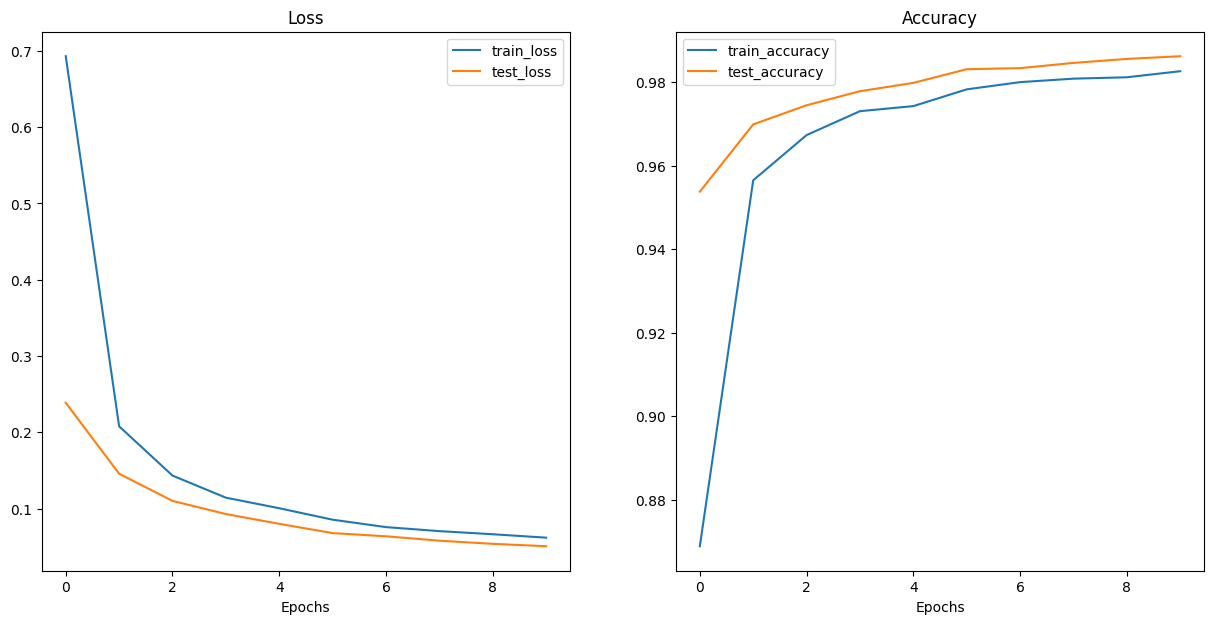

In [ ]:
plot_loss_curve(resnet_result)

In [ ]:
model_0.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-7.4457e-03, -3.1783e-03,  3.7353e-02,  ...,  4.7936e-02,
                         -2.0325e-02,  8.8140e-03],
                        [-5.7435e-02,  4.4709e-02,  7.7509e-02,  ...,  8.8442e-02,
                          2.9346e-02, -5.8331e-02],
                        [ 6.8356e-02, -2.7044e-01,  4.0348e-01,  ..., -1.6491e-01,
                          2.1868e-01, -7.2909e-02],
                        ...,
                        [-1.0874e-01,  3.8148e-01, -4.5487e-01,  ...,  6.8366e-01,
                         -5.7855e-01,  2.2461e-01],
                        [ 2.5698e-02, -1.7703e-01,  6.4375e-01,  ...,  5.2644e-01,
                         -4.9317e-02, -6.8082e-02],
                        [ 4.5281e-02, -1.3072e-01,  1.7864e-02,  ..., -3.5753e-01,
                          1.8976e-01, -2.2302e-02]],
              
                       [[ 8.9197e-03,  4.8768e-03, -1.5356e-02,  ...,  8.6949e-02,
                         -6.5541

save model

In [ ]:
import torch.nn as nn
import torchvision.models as models
from torchvision.models import ResNet50_Weights
import torch
from torch.utils.data import DataLoader
from torchvision import models,transforms

def create_resnet_model(num_classes: int):
   #load a pre-trained resnet50 model for transfer learning
    model = models.resnet50(weights=ResNet50_Weights.DEFAULT)
    #freeze the base model parameters
    for param in model.parameters():
        param.requires_grad = False

      #replace the final fully conencted layer
    model.fc = nn.Linear(in_features=model.fc.in_features,out_features=num_classes)

    for param in model.layer4.parameters():
        param.requires_grad = True

    return model

    num_classes = 37
    model = create_resnet_model(num_classes)


Apply Pruning

Why pruning?

because most of the weights in a nn can be removed with limited to no effect on the loss(pruning)


why is it useful?

Faster inference time:

Resnet 50 real time example on a 4 core cpu

4 years ago, a few hundread milliseconds per image

today, tens of millisecond per image

pruned, sub ten millisecond


reduction in size:

vgg 16 is around 500 mb

prohibitive for most edge deployment

with pruning, 11.3mb

In [ ]:
from torch.nn.utils import prune
from torchvision import models
import torch.nn as nn
import torch.optim as optim

num_classes = 37
model = create_resnet_model(num_classes)
#Prune 20% of the weights in the first convolutional layer
prune.random_unstructured(model.conv1, name="weight", amount=0.2)

#prune 20% of the weights in the fully connected layer
prune.random_unstructured(model.fc, name="weight", amount=0.2)

#prune 20% of the weights in the layer4
prune.random_unstructured(model.layer4[0].conv1, name="weight", amount=0.2)

#set up the optimizer and training parameter
optimizer = optim.Adam(model.parameters(), lr=0.001)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 233MB/s]


Quantization

In [7]:
import torch
import torch.nn.utils.prune as prune

# Assume you have a pruned/quantized model after training
def remove_pruning(model):
    for module in model.modules():
        if hasattr(module, "weight_orig") and hasattr(module, "weight_mask"):
            # Restore the actual weight by combining original weight and mask
            module.weight = torch.nn.Parameter(module.weight_orig * module.weight_mask)
            # Remove the original and mask parameters
            del module._parameters["weight_orig"]
            del module._buffers["weight_mask"]
    return model

# Remove pruning wrappers
model = remove_pruning(model)

# Save a clean state_dict
torch.save(model.state_dict(), "clean_model.pth")
print("Clean model saved successfully")


Clean model saved successfully


In [ ]:
from google.colab import drive
import torch
drive.mount('/content/drive') # Mount drive if not already mounted

# Save the model
torch.save(quantized_model.state_dict(), '/content/drive/MyDrive/my_model.pth')
print("Already save it to drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Already save it to drive


Load model

In [ ]:
# 1. Redefine the same model structure
import torch.nn as nn
import torchvision.models as models
from torchvision.models import ResNet50_Weights
import torch
from torch.utils.data import DataLoader
from torchvision import models,transforms

def create_resnet_model(num_classes: int):
   #load a pre-trained resnet50 model for transfer learning
    model = models.resnet50(weights=ResNet50_Weights.DEFAULT)
    #freeze the base model parameters
    for param in model.parameters():
        param.requires_grad = False

      #replace the final fully conencted layer
    model.fc = nn.Linear(in_features=model.fc.in_features,out_features=num_classes)

    for param in model.layer4.parameters():
        param.requires_grad = True

    return model

    num_classes = 37
    model = create_resnet_model(num_classes)

# 2. Recreate the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = create_resnet_model(num_classes).to(device)

# 3. Load the weights
model.load_state_dict(torch.load("quantized_model.pth", map_location=device),strict=False)
model.eval()
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [ ]:
print(quantized_model)


RecursiveScriptModule(
  original_name=ResNet
  (conv1): RecursiveScriptModule(original_name=Conv2d)
  (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
  (relu): RecursiveScriptModule(original_name=ReLU)
  (maxpool): RecursiveScriptModule(original_name=MaxPool2d)
  (layer1): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(
      original_name=Bottleneck
      (conv1): RecursiveScriptModule(original_name=Conv2d)
      (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
      (conv2): RecursiveScriptModule(original_name=Conv2d)
      (bn2): RecursiveScriptModule(original_name=BatchNorm2d)
      (conv3): RecursiveScriptModule(original_name=Conv2d)
      (bn3): RecursiveScriptModule(original_name=BatchNorm2d)
      (relu): RecursiveScriptModule(original_name=ReLU)
      (downsample): RecursiveScriptModule(
        original_name=Sequential
        (0): RecursiveScriptModule(original_name=Conv2d)
        (1): RecursiveScriptModule(original_name=B